<a href="https://colab.research.google.com/github/CoolfaceJerkCity/Grupo_N_UDEP_Python/blob/main/TrabajoFinalOp_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importaciones

In [ ]:
#General Libraries
import numpy as np
import pandas as pd 
from pandas import get_dummies

# Statistic & Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score,precision_score, r2_score, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Visualiztion Libraries
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt


#warnings
from warnings import filterwarnings
filterwarnings('ignore')
separador = '='*100

##Obteniendo la data

In [ ]:
df_stroke = pd.read_csv('https://raw.githubusercontent.com/CoolfaceJerkCity/Grupo_N_UDEP_Python/main/df_strokes_lbl_encoded.csv')
df_stroke = df_stroke[:750]
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,0,1
2,0,49.0,0,0,1,1,171.23,34.4,0,1
3,0,79.0,1,0,1,0,174.12,24.0,0,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


##Separando la data de x e y

In [ ]:
X = np.array(df_stroke.drop(columns =['stroke']))
y = np.array(df_stroke['stroke'])

##Entrenando el modelo

In [ ]:
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.3, random_state = 42)

##Logistic Regression

In [ ]:
modeloLR = LogisticRegression(solver = "liblinear")
modeloLR.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
testscore_lr = accuracy_score(ytest, modeloLR.predict(Xtest))
accuracy_score(ytest, modeloLR.predict(Xtest)) 

0.7822222222222223

In [ ]:
crosscore_lr =cross_val_score(modeloLR, Xtest, ytest, cv = 10).mean() 
cross_val_score(modeloLR, Xtest, ytest, cv = 10).mean()

0.7683794466403162

Grafica de 'xtest' y 'ytest'


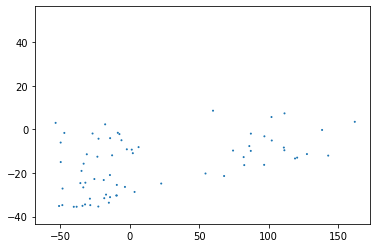

****************************************************************************************************
Grafica de 'xtest' con 'y de predicción'


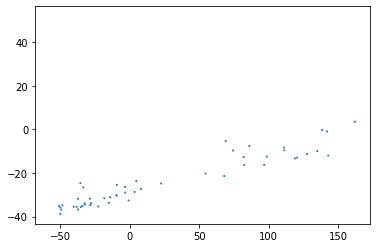

****************************************************************************************************


In [ ]:
###  Graficas Analiticas para Regresión Logística ###
y_predict = modeloLR.predict(Xtest)
Pca1=PCA(n_components=2)
Pca1.fit(Xtest)
Xpca1=Pca1.fit_transform(Xtest)

print("Gráfica de 'xtest' y 'ytest'")
s=500
GR_RL=plt.scatter(Xpca1[:,0],Xpca1[:,1],ytest)
plt.show()
print("*"*100)
print("Gráfica de 'xtest' con 'y de predicción'")
GR_RL2=plt.scatter(Xpca1[:,0],Xpca1[:,1],y_predict)
plt.show()
print("*"*100)

##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn_tuned = knn.fit(Xtrain, ytrain)
knn_tuned.score(Xtest, ytest)

0.7022222222222222

In [ ]:
y_pred = knn_tuned.predict(Xtest)
testscore_knn =accuracy_score(ytest, y_pred)

In [ ]:
y_pred = knn_tuned.predict(Xtest)
crosscore_knn=accuracy_score(ytest, y_pred)
accuracy_score(ytest, y_pred) 

0.7022222222222222

Gráfica de 'xtest' y 'ytest'


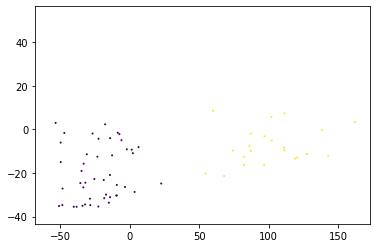

****************************************************************************************************
Gráfica de 'xtest' con 'y de predicción'


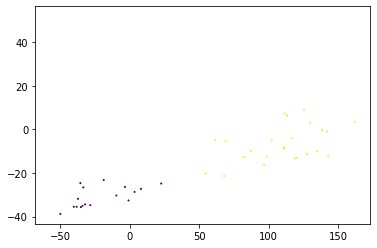

****************************************************************************************************


In [ ]:
###  Graficas Analiticas para KNN ###
k_m2=KMeans(n_clusters=2)
k_m2.fit(Xtest)
label=k_m2.labels_

Pca=PCA(n_components=2)
Pca.fit(Xtest)
Xpca=Pca.fit_transform(Xtest)
#  Graficos
print("Gráfica de 'xtest' y 'ytest'")
GR_KNN=plt.scatter(Xpca[:,0],Xpca[:,1],ytest,c = label)

plt.show()
print("*"*100)
print("Gráfica de 'xtest' con 'y de predicción'")
GR_KNN2=plt.scatter(Xpca[:,0],Xpca[:,1],y_pred,c = label)
plt.show()
print("*"*100)

##SVC

In [ ]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(Xtrain, ytrain)
y_pred = svc_tuned.predict(Xtest)
crosscore_svm = accuracy_score(ytest, y_pred)

In [ ]:
testscore_svm=accuracy_score(ytest, y_pred)
accuracy_score(ytest, y_pred) #test acc

0.7733333333333333

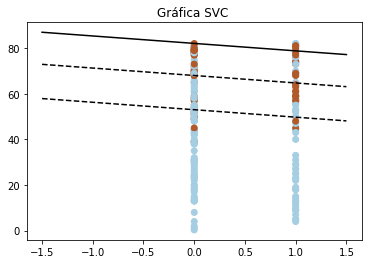

In [ ]:
##Gráfica Analítica SVC##
#Recta para separar las clases##
w= svc_tuned.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1.5, 1.5)
yy = a * xx - (svc_tuned.intercept_[0]) / w[1]
# vectores
b = svc_tuned.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svc_tuned.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(svc_tuned.support_vectors_[:, 0], svc_tuned.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=plt.cm.Paired)

plt.title('Gráfica SVC ')
plt.axis('tight')
plt.show()

##Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 5, max_features = 2, min_samples_split = 5, n_estimators = 5)
rf_tuned.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=5)

In [ ]:
y_pred = rf_tuned.predict(Xtest)
testscore_rf=accuracy_score(ytest, y_pred)
accuracy_score(ytest, y_pred)

0.7466666666666667

In [ ]:
crosscore_rf=accuracy_score(ytest, y_pred)
accuracy_score(ytest, y_pred)

0.7466666666666667

Histograma de la importancia de las variables


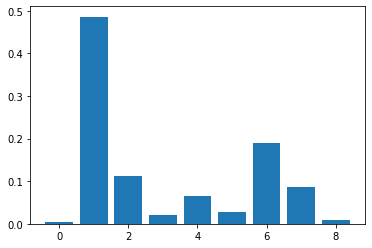

In [ ]:
##Gráfica Analítica Random Forest##
print("Histograma de la importancia de las variables")
plt.bar(range(len(rf_tuned.feature_importances_)), rf_tuned.feature_importances_)
plt.show()

##Funciones para validar datos

In [ ]:
def lee_float():
   while True:
       entrada = input("Ingrese un valor: ")
       try:
           entrada = float(entrada)
           return entrada
       except ValueError:
           print(separador)
           print("Valor no válido") 


def lee_float2():
  #Float con rango de valores
    while True:
       entrada = input("Ingrese un valor: ")
       try:
         entrada = float(entrada)
         if (1 <= float(entrada) <= 4):
           return entrada
         else:
           print("Valor no válido")
       except ValueError:
           print(separador)
           print("Valor no válido")

def lee_floatbin():
  #Float con rango de valores
    while True:
       entrada = input("Ingrese un valor: ")
       try:
         entrada = float(entrada)
         if (0 <= float(entrada) <= 1):
           return entrada
         else:
           print("Valor no válido")
       except ValueError:
           print(separador)
           print("Valor no válido")

##Seleccionando el modelo

In [ ]:
def seleccionamodelo(paciente):
  #Panel de opciones
  print('Ingrese el número de modelo que desea emplear')
  print('1 para el modelo Logistic Regresion')
  print('2 para el modelo KNN')
  print('3 para modelo SVC')
  print('4 para modelo Random Forest')
  
  #Opciones a ingresar

  contador = 0
  opciones = []
  pregunta = 's'
  
  while pregunta == 'S' or pregunta == 's':
    
    if contador == 4:
      break
    
    opciones.append(lee_float2())
    pregunta = input('S para elegir un modelo adicional u otra tecla para salir: ')
    contador +=1

  print(opciones)
  
  #Ejecutar los modelos

  for i in range(0,len(opciones)):
    datos_paciente = pd.DataFrame(paciente)
    
    #Modelo Logistic regresion
    if opciones[i] == 1:
      prediction = modeloLR.predict(datos_paciente)         

    #Modelo KNN
    elif opciones[i] == 2:
      prediction = knn_tuned.predict(datos_paciente)          
    
    #Modelo SVC
    elif opciones[i] == 3:
      prediction = svc_tuned.predict(datos_paciente)            
    
    #Modelo RF
    elif opciones[i] == 4:
      prediction = rf_tuned.predict(datos_paciente)     
      
    #Predicción 
    print(prediction) 
    
    if prediction == 0:
          print('Tiene bajo riesgo de sufrir un derrame')
    else:
          print('Tiene un riesgo elevado de sufrir un derrame')

##Main

In [ ]:
#Función para llenar datos
def llenardatos():
  info = []
  global df_stroke
  y = df_stroke["stroke"] 
  X = df_stroke.drop(["stroke"], axis=1)
  columnas = list(X.columns.values)
  for i in range(0,len(columnas)):

      if columnas[i]== 'gender':
        print('Ingrese 1 si es hombre o 0 si es mujer')
        info.append([lee_floatbin()])
      
      elif columnas[i]== 'age':
        print('Ingrese su edad')
        info.append([lee_float()])
      
      elif columnas[i]== 'hypertension':
        print('Ingrese 1 si sufre de hipertensión o 0 si no es el caso')
        info.append([lee_floatbin()])
      
      elif columnas[i]== 'heart_disease':
        print('Ingrese 1 si sufre de enfermedades cardíacas o 0 si no es el caso')
        info.append([lee_floatbin()])

      elif columnas[i]== 'ever_married':
        print('Ingrese 1 si se ha casado o 0 si no es el caso')
        info.append([lee_floatbin()])
      
      elif columnas[i]== 'Residence_type':
        print('Ingrese 1 si vive en la ciudad o 0 si no es el caso')
        info.append([lee_floatbin()])
      
      elif columnas[i]== 'avg_glucose_level':
        print('Ingrese su nivel de glucosa')
        info.append([lee_float()])
      
      elif columnas[i]== 'bmi':
        print('Ingrese su índice de masa corporal')
        info.append([lee_float()])
      
      elif columnas[i]== 'smoking_status':
        print('Ingrese 1 si fuma o si no es el caso')
        info.append([lee_float()])
      
      print(separador)
  
  paciente = dict(zip(columnas,info))
  print(paciente)
  return paciente

In [ ]:
#Patients ejemplo
Patient1={'gender':[1],'age':[23],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
          'avg_glucose_level':[250.00],'bmi':[22],'smoking_status':[0]}


Patient2={'gender':[1],'age':[68],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
          'avg_glucose_level':[221.67],'bmi':[28],'smoking_status':[1]}


Patient3={'gender':[0],'age':[20],'hypertension':[0],'heart_disease':[0],'ever_married':[0],'residence_type':[1],
          'avg_glucose_level':[87],'bmi':[19],'smoking_status':[0]}

Patient4={'gender':[0],'age':[76],'hypertension':[1],'heart_disease':[1],'ever_married':[1],'residence_type':[1],
          'avg_glucose_level':[155],'bmi':[31],'smoking_status':[1]}

Patient5={'gender':[1],'age':[23],'hypertension':[1],'heart_disease':[1],'ever_married':[0],'residence_type':[0],
          'avg_glucose_level':[167],'bmi':[31],'smoking_status':[0]}


Patient6={'gender':[0],'age':[85],'hypertension':[0],'heart_disease':[0],'ever_married':[1],'residence_type':[0],
          'avg_glucose_level':[90],'bmi':[21],'smoking_status':[0]}

In [ ]:
def main():
  print('Bienvenido al programa')
  print('Ingrese los valores de las siguientes columnas: ')
  paciente = llenardatos()
  seleccionamodelo(paciente)

main()

Bienvenido al programa
Ingrese los valores de las siguientes columnas: 
Ingrese 1 si es hombre o 0 si es mujer
Ingrese un valor: 1
Ingrese su edad
Ingrese un valor: 68
Ingrese 1 si sufre de hipertensión o 0 si no es el caso
Ingrese un valor: 1
Ingrese 1 si sufre de enfermedades cardíacas o 0 si no es el caso
Ingrese un valor: 1
Ingrese 1 si se ha casado o 0 si no es el caso
Ingrese un valor: 1
Ingrese 1 si vive en la ciudad o 0 si no es el caso
Ingrese un valor: 1
Ingrese su nivel de glucosa
Ingrese un valor: 221.67
Ingrese su índice de masa corporal
Ingrese un valor: 28
Ingrese 1 si fuma o si no es el caso
Ingrese un valor: 1
{'gender': [1.0], 'age': [68.0], 'hypertension': [1.0], 'heart_disease': [1.0], 'ever_married': [1.0], 'Residence_type': [1.0], 'avg_glucose_level': [221.67], 'bmi': [28.0], 'smoking_status': [1.0]}
Ingrese el número de modelo que desea emplear
1 para el modelo Logistic Regresion
2 para el modelo KNN
3 para modelo SVC
4 para modelo Random Forest
Ingrese un valor: